# Bank Customer Churn Analysis

## Introduction
This notebook presents a comprehensive analysis aimed at determining Bank Customer Churn, predicting whether a customer will leave the bank using robust and accurate classification models.

## Workflow

### 1. Data Cleaning
- Handle missing values
- Normalize data
- Format data
- Convert categorical data into quantitative

### 2. Exploratory Data Analysis (EDA)
- Descriptive Statistics
- Data Visualization

### 3. Model Training
- Logistic Regression
- Decision Trees
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)

### 4. Model Evaluation
- Accuracy
- Jaccard Score
- F1 Score
- Log Loss

### 5. Model Deployment

## Database Information
- **RowNumber**: Record (row) number, no effect on the output.
- **CustomerId**: Random values, no effect on customer leaving the bank.
- **Surname**: Customer's surname, no impact on their decision to leave.
- **CreditScore**: Higher credit score, less likely to leave.
- **Geography**: Customer’s location can affect their decision to leave.
- **Gender**: Explore if gender plays a role in leaving.
- **Age**: Older customers are less likely to leave.
- **Tenure**: Number of years as a client; older clients are more loyal.
- **Balance**: Higher account balance, less likely to leave.
- **NumOfProducts**: Number of products purchased through the bank.
- **HasCrCard**: Whether a customer has a credit card; those with cards are less likely to leave.
- **IsActiveMember**: Active customers are less likely to leave.
- **EstimatedSalary**: Lower salary, more likely to leave.
- **Exited**: Whether the customer left the bank.
- **Complain**: Customer has complaints or not.
- **Satisfaction Score**: Score provided by the customer for complaint resolution.
- **Card Type**: Type of card held by the customer.
- **Points Earned**: Points earned by the customer for using credit card.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score,f1_score
from sklearn.preprocessing import StandardScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 1. Data Cleaning

In [4]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

**Let's rename the columns**

In [5]:
df.rename(columns={"Satisfaction Score":"SatisfactionScore",
                   "Point Earned":"PointEarned",
                  "Card Type":"CardType"},inplace=True
         )

**Drop unnecessary columns:**

In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df.dtypes

CreditScore            int64
Geography             object
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Complain               int64
SatisfactionScore      int64
CardType              object
PointEarned            int64
dtype: object

**We should convert categorical columns into quantitative columns**

In [8]:
categoricalCols = df.select_dtypes(include='object').columns
categoricalCols

Index(['Geography', 'Gender', 'CardType'], dtype='object')

In [9]:
for col in categoricalCols :
    print(df[col].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
CardType
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


In [10]:
for col in categoricalCols:
    dummyVar= pd.get_dummies(df[col]).astype(int)
    df=pd.concat([df,dummyVar],axis=1)
    
df.drop(columns=categoricalCols,inplace=True)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,PointEarned,France,Germany,Spain,Female,Male,DIAMOND,GOLD,PLATINUM,SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


## 2. Exploratory Data Analysis (EDA)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Complain           10000 non-null  int64  
 10  SatisfactionScore  10000 non-null  int64  
 11  PointEarned        10000 non-null  int64  
 12  France             10000 non-null  int64  
 13  Germany            10000 non-null  int64  
 14  Spain              10000 non-null  int64  
 15  Female             10000 non-null  int64  
 16  Male               1000

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,PointEarned,France,Germany,Spain,Female,Male,DIAMOND,GOLD,PLATINUM,SILVER
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,...,606.515100,0.501400,0.250900,0.247700,0.454300,0.545700,0.250700,0.25020,0.249500,0.249600
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,...,225.924839,0.500023,0.433553,0.431698,0.497932,0.497932,0.433438,0.43315,0.432745,0.432803
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,...,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,...,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,...,605.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,...,801.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,...,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Figure size 800x600 with 0 Axes>

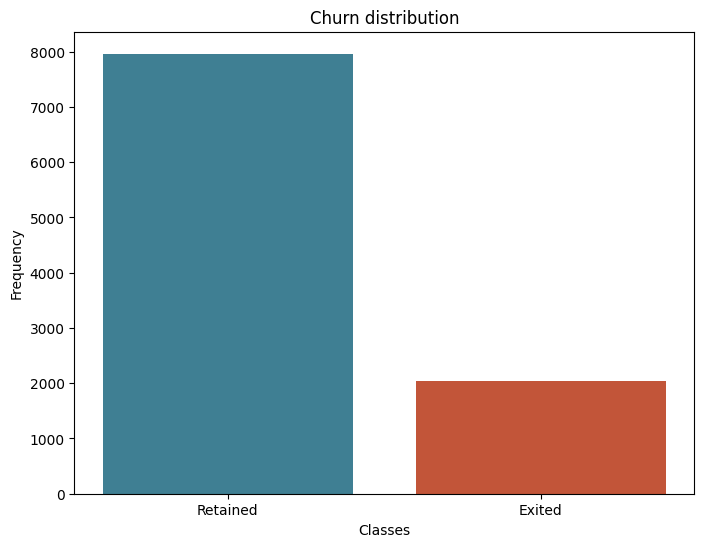

In [13]:
plt.figure(figsize=(8, 6))

labels = ['Retained', 'Exited']
colors = ['#3f7f93', '#c25539']

class_counts = [len(df[df['Exited'] == 0]), len(df[df['Exited'] == 1])]

plt.figure(figsize=(8, 6))
plt.bar(['Retained', 'Exited'], class_counts, color=[colors[0], colors[1]])
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Churn distribution')

plt.show()

In [14]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

In our analysis of client data, we have observed the following distribution of client retention and exit rates:

- 20.4% of clients are exited.
- 79.6% of clients are retained.

Based on this distribution, we can say that we have a skewed dataset. The exited clients represent a minority class, making it almost a rare class.

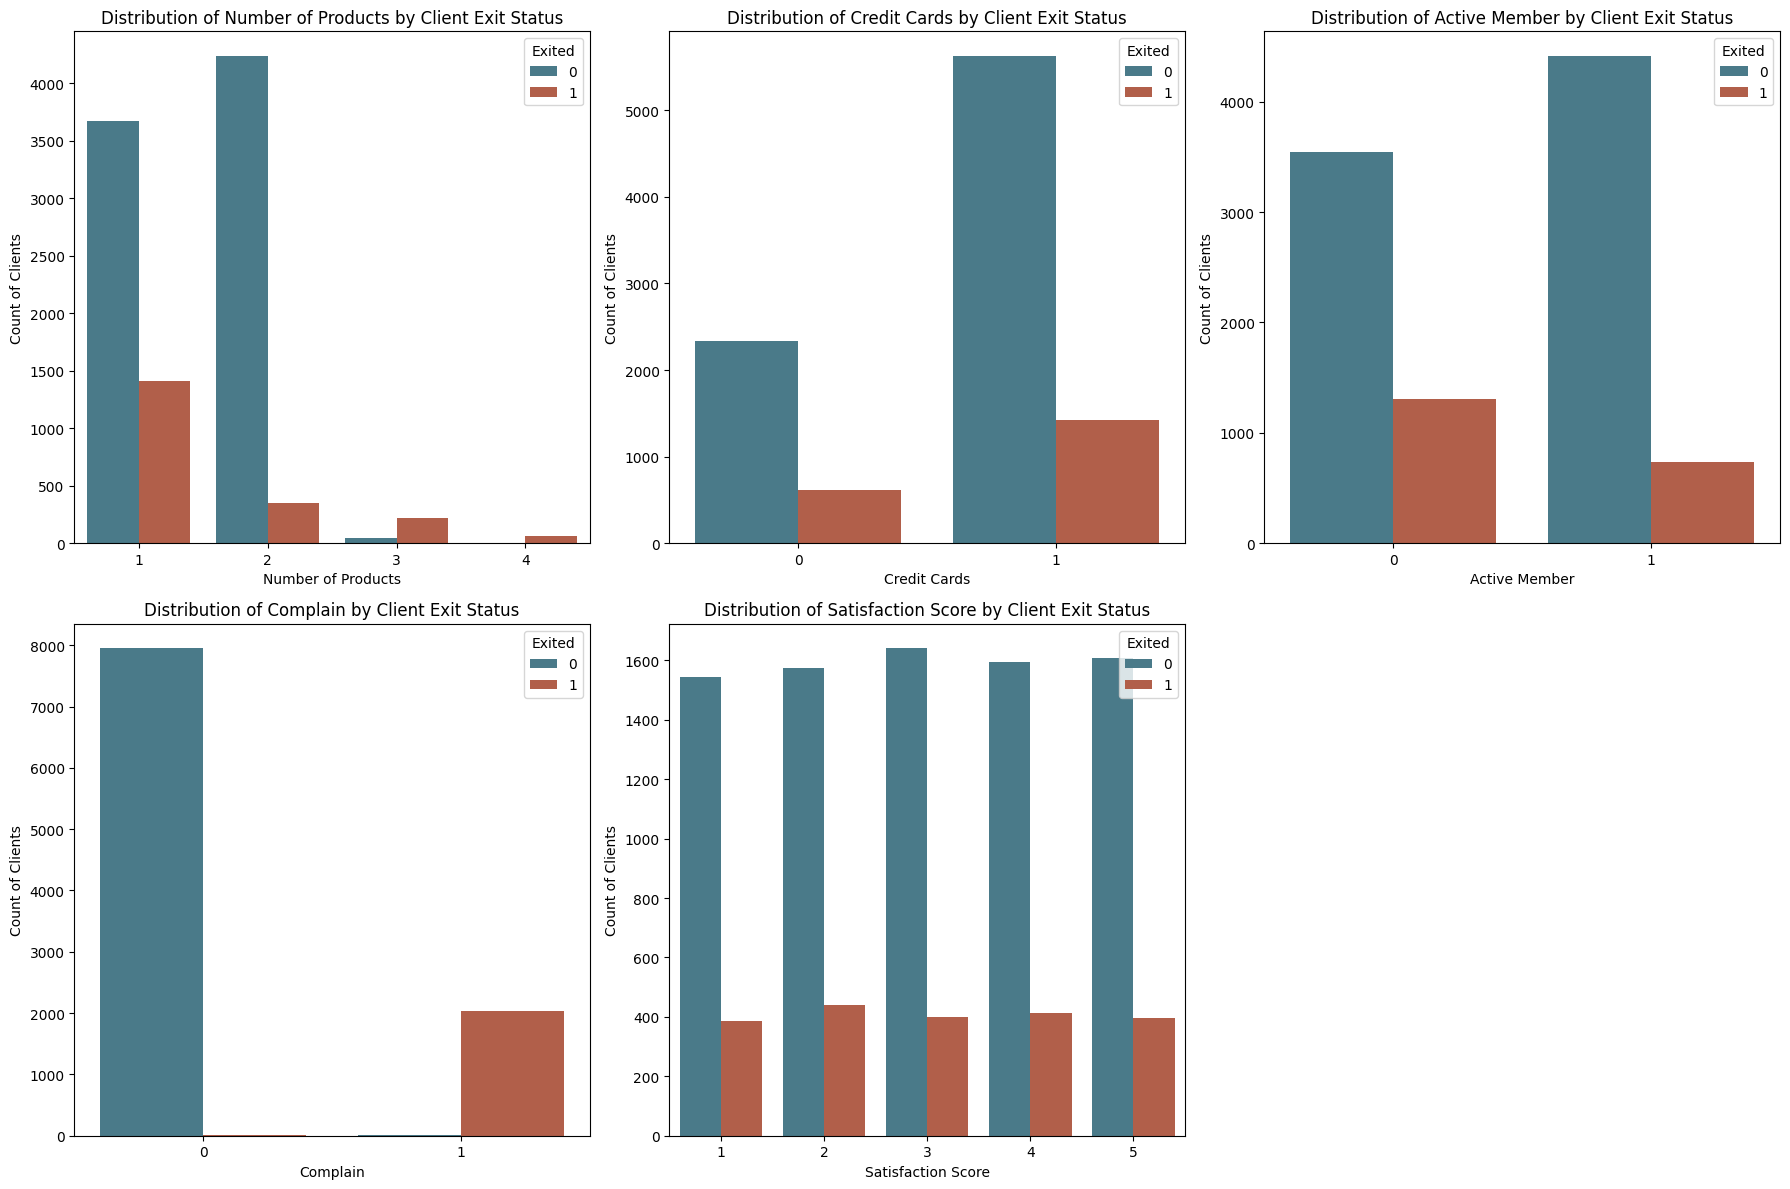

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12)) #creates a figure (fig) and a grid of subplots (axes) with 2 rows and 3 columns.

columns = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'SatisfactionScore']
titles = ["Number of Products", "Credit Cards", "Active Member", "Complain", "Satisfaction Score"]

for ax, column, title in zip(axes.flatten(), columns, titles): #axes.flatten() converts the 2x3 grid of axes into a 1D array so that we can iterate over it easily.
    sns.countplot(data=df, x=column, hue='Exited', ax=ax, palette=colors)
    ax.set_title(f"Distribution of {title} by Client Exit Status", loc='center')
    ax.set_xlabel(title)
    ax.set_ylabel("Count of Clients")

# Remove the last subplot
fig.delaxes(axes[1][2])

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### Distribution Analysis by Client Exit Status

We have analyzed various factors to understand their impact on client retention and exit rates. Below are the key observations for each factor:

#### 1. Distribution of Number of Products by Client Exit Status

**Observation**: Retained clients have a higher rate for 1 or 2 products, while exited clients have a higher rate for 3 or 4 products.

#### 2. Distribution of Credit Card by Client Exit Status

**Observation**: Retained clients have a higher rate in both cases: having a credit card and not having a credit card.

#### 3. Distribution of Active Members by Client Exit Status

**Observation**: Retained clients dominate in both cases: active and not active.

#### 4. Distribution of Complains by Client Exit Status

**Observation**: Clients who do not complain are retained, while those who complain are more likely to exit.

#### 5. Distribution of Satisfaction by Client Exit Status

**Observation**: Retained clients vote more than exited clients across all types of satisfaction scores.

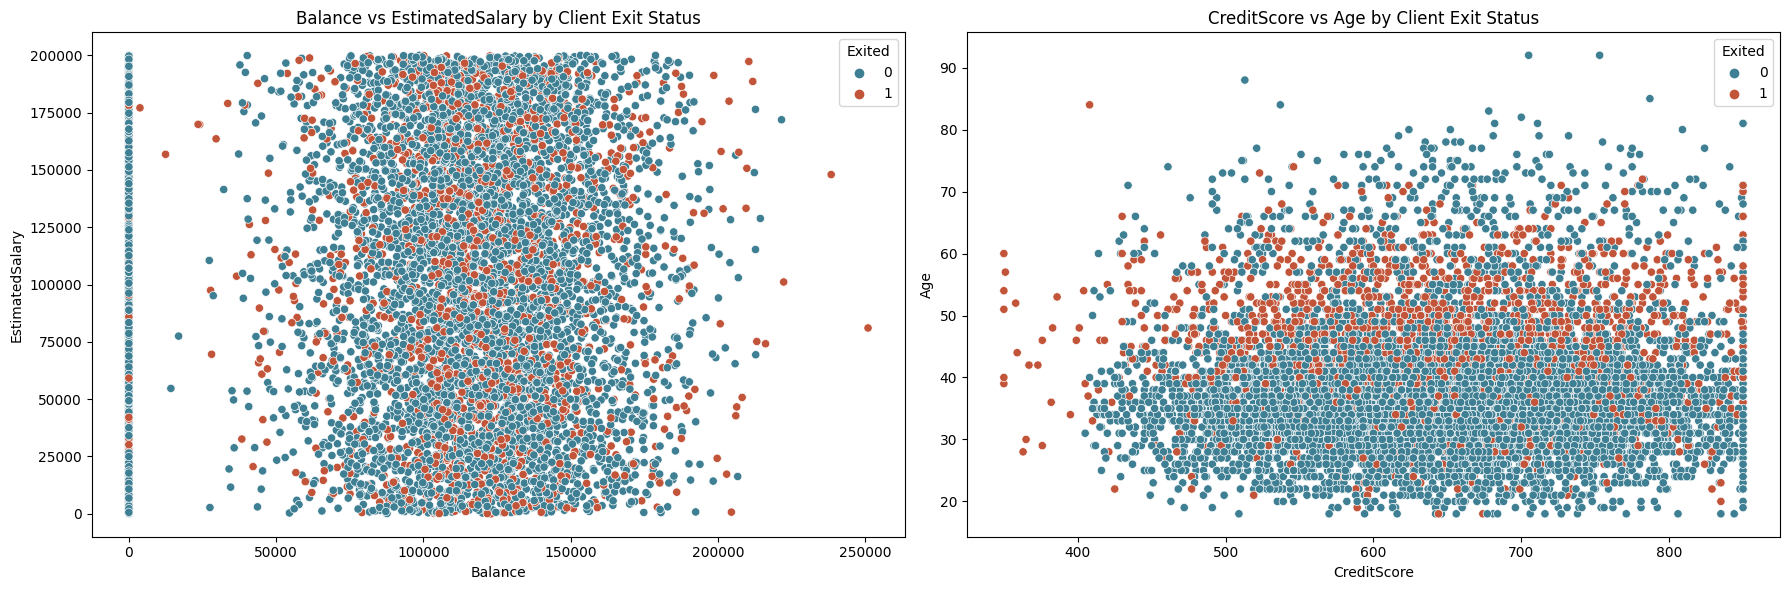

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

x_columns = ['Balance', 'CreditScore']
y_columns = ['EstimatedSalary', 'Age']

for ax, x_col, y_col in zip(axes.flatten(), x_columns, y_columns):
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='Exited', ax=ax, palette=colors)
    ax.set_title(f"{x_col} vs {y_col} by Client Exit Status", loc='center')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

plt.tight_layout()

plt.show()


**Balance vs estimated salary by client exit status:**
In the first scatter plot, we observe the relationship between Balance and Estimated Salary, categorized by Client Exit Status (0 or 1). The balance values range from 0 to approximately 250,000, with a notable vertical line at Balance = 0, indicating a significant number of clients with no balance. The estimated salary values are spread between 0 and 200,000, showing a fairly even distribution. Many clients with a balance of 0 have exited (represented by red dots), suggesting that having no balance might be associated with a higher exit rate.

**CreditScore vs Age by Client Exit Status:**
In the scatter plot, we observe the relationship between Age and Credit Score. Age values range from approximately 20 to 90, while credit score values range from approximately 350 to 850. The scores are spread throughout the range. The largest distribution is between the ages of 20 and 60, where retained clients (represented by blue dots) dominate. Exited clients (represented by red dots) appear more dispersed but tend to be more prevalent between the ages of 40 and 70.

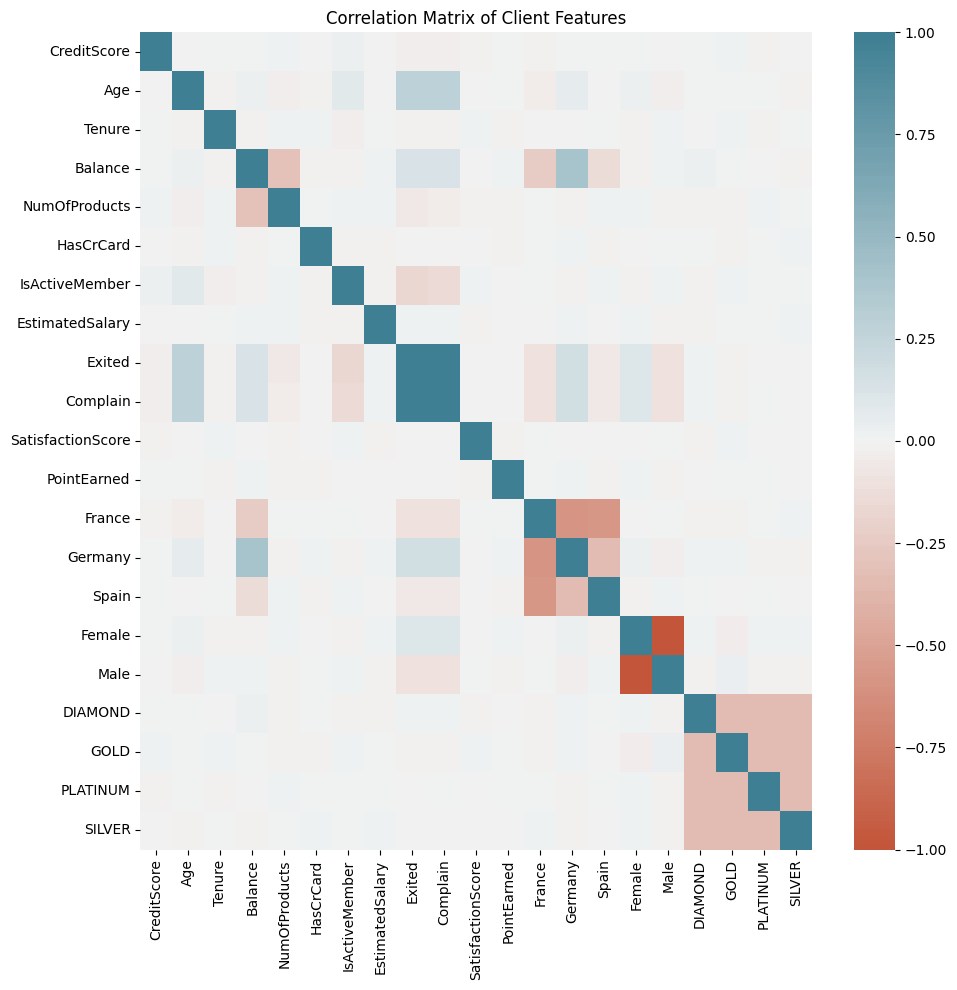

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=False, cmap=sns.diverging_palette(20, 220, n=200), center=0)
plt.title('Correlation Matrix of Client Features', loc='center')
plt.tight_layout() 
plt.show()

**This correlation matrix** shows the relationships between various client features. A strong positive correlation (close to 1.0) means that as one feature increases, the other also tends to increase. A strong negative correlation (close to -1.0) means that as one feature increases, the other tends to decrease. Key observations include strong negative correlations between male and female clients, and between certain membership tiers like DIAMOND, GOLD, PLATINUM, and SILVER. Additionally, features like "Exited" and "Complain" show meaningful correlations with other variables, suggesting factors that could influence customer retention and satisfaction.

## 3. Model Training

In [18]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,cmap=sns.diverging_palette(20, 220, n=200), center=0); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Exited', 'Retained']); ax.yaxis.set_ticklabels(['Exited', 'Retained']) 
    plt.show()

In [19]:
Y=pd.Series(df['Exited'].to_numpy())
X = df[['Age', 'Complain', 'Balance', 'IsActiveMember', 'NumOfProducts', 'France', 'Germany', 'Spain', 'Female', 'Male']]
Y.tail(10)

9990    0
9991    1
9992    0
9993    0
9994    0
9995    0
9996    0
9997    1
9998    1
9999    0
dtype: int64

In [20]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42, stratify=Y)
#stratify ensures that the train-test split maintains the same proportion of classes as the original dataset.

20% of the data will be used for testing, and the remaining 80% will be used for training.

In [21]:
print(f"the distribution of the target variable in the training set :\n{Y_train.value_counts(normalize=True)}")

the distribution of the target variable in the training set :
0    0.79625
1    0.20375
Name: proportion, dtype: float64


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
print(f"Resampled training set distribution:\n{Y_train_resampled.value_counts(normalize=True)}")
print(f"Test set distribution:\n{Y_test.value_counts(normalize=True)}")


Resampled training set distribution:
0    0.5
1    0.5
Name: proportion, dtype: float64
Test set distribution:
0    0.796
1    0.204
Name: proportion, dtype: float64


In [23]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

### 3.1 Logistic Regression

In [41]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lr=LogisticRegression(class_weight='balanced')

# GridSearchCV performs exhaustive search over specified parameter values for an estimator using cross-validation. 
# cv=10 splits data into 8 folds, training and validating the model 10 times, each with a different fold as the 
# validation set and the remaining as training. This ensures reliable and robust performance evaluation.
logreg_cv = GridSearchCV(lr, parameters, cv=5)
logreg_cv.fit(X_train_resampled, Y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [42]:
print("Tuned hyperparameters - Best parameters : ",logreg_cv.best_params_)
print("Cross-validated accuracy: ",logreg_cv.best_score_) # best cross-validated score on the training data

Tuned hyperparameters - Best parameters :  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Cross-validated accuracy:  0.9985871271585557


In [43]:
logreg_accuracy = logreg_cv.score(X_test, Y_test)
logreg_accuracy # is the score of the best model on the test data

0.9985

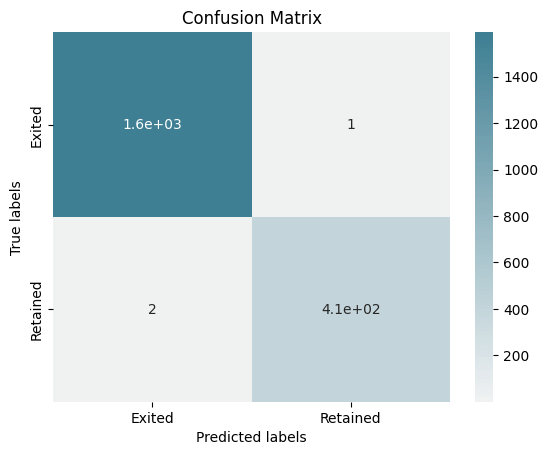

In [44]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

* **True Positives**: 1600 instances correctly classified as "Exited."
* **True Negatives**: 380 instances correctly classified as "Retained."
* **False Positives**: 1 instance incorrectly classified as "Exited" when it is actually "Retained."
* **False Negatives**: 1 instance incorrectly classified as "Retained" when it is actually "Exited."

### 2.3 SVM

In [28]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-2, 2, 3),
              'gamma':np.logspace(-2, 2, 3)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=5)
svm_cv.fit(X_train_resampled, Y_train_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e+00, 1.e+02]),
                         'gamma': array([1.e-02, 1.e+00, 1.e+02]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [29]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.01, 'kernel': 'linear'}
accuracy : 0.9991365777080062


In [30]:
svm_accuracy = svm_cv.score(X_test, Y_test)
svm_accuracy

0.9985

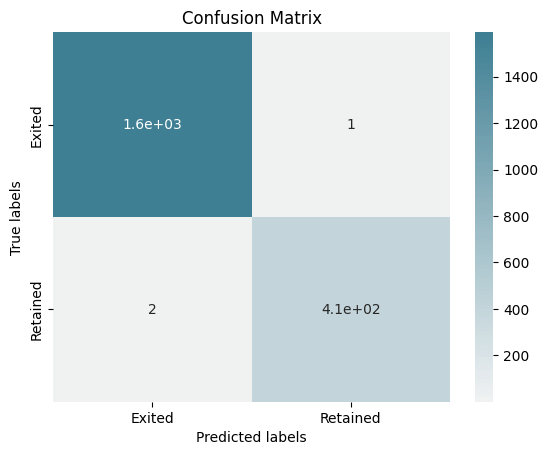

In [31]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

* **True Positives**: 1600 instances correctly classified as "Exited."
* **True Negatives**: 380 instances correctly classified as "Retained."
* **False Positives**: 1 instance incorrectly classified as "Exited" when it is actually "Retained."
* **False Negatives**: 1 instance incorrectly classified as "Retained" when it is actually "Exited."

### 3.3 Decision Tree

In [32]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=5)
tree_cv.fit(X_train_resampled, Y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [33]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.9990580847723706


In [34]:
tree_accuracy = tree_cv.score(X_test, Y_test)
tree_accuracy

0.995

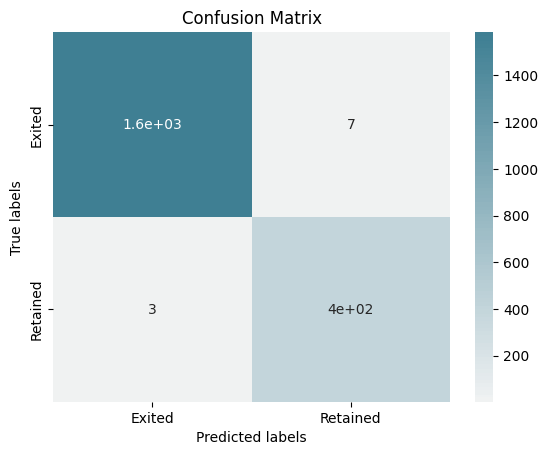

In [35]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

* **True Positives**: 1600 instances correctly classified as "Exited."
* **True Negatives**: 380 instances correctly classified as "Retained."
* **False Positives**: 1 instance incorrectly classified as "Exited" when it is actually "Retained."
* **False Negatives**: 2 instance incorrectly classified as "Retained" when it is actually "Exited."

### 3.4 KNN

In [36]:
parameters = {'n_neighbors': [1, 3, 5, 7, 9],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=5)
knn_cv.fit(X_train_resampled, Y_train_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2]})

In [37]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
accuracy : 0.9985871271585557


In [38]:
knn_accuracy = knn_cv.score(X_test, Y_test)
knn_accuracy

0.9985

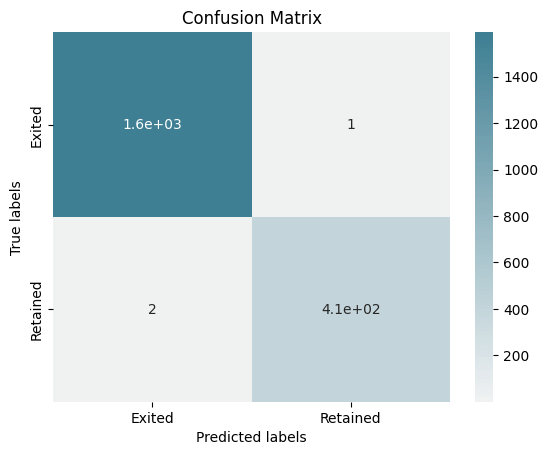

In [39]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

* **True Positives**: 1600 instances correctly classified as "Exited."
* **True Negatives**: 370 instances correctly classified as "Retained."
* **False Positives**: 17 instance incorrectly classified as "Exited" when it is actually "Retained."
* **False Negatives**: 1 instance incorrectly classified as "Retained" when it is actually "Exited."

## 4.Model Evaluation

In [45]:
jaccard_scores = [
                  jaccard_score(Y_test, logreg_cv.predict(X_test), average='binary'),
                  jaccard_score(Y_test, svm_cv.predict(X_test), average='binary'),
                  jaccard_score(Y_test, tree_cv.predict(X_test), average='binary'),
                  jaccard_score(Y_test, knn_cv.predict(X_test), average='binary'),
                 ]

f1_scores = [
             f1_score(Y_test, logreg_cv.predict(X_test), average='binary'),
             f1_score(Y_test, svm_cv.predict(X_test), average='binary'),
             f1_score(Y_test, tree_cv.predict(X_test), average='binary'),
             f1_score(Y_test, knn_cv.predict(X_test), average='binary'),
            ]

accuracy = [logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy]

scores = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy]),
                      index=['Jaccard_Score', 'F1_Score', 'Accuracy'],
                      columns=['LogReg', 'SVM', 'Tree', 'KNN'])
scores

,LogReg,SVM,Tree,KNN
Jaccard_Score,0.992665,0.992665,0.975904,0.992665
F1_Score,0.996319,0.996319,0.987805,0.996319
Accuracy,0.998500,0.998500,0.995000,0.998500


### **Conclusion**
Based on the confusion matrices and the table provided, Logistic Regression and Support Vector Machines (SVM) demonstrate high Jaccard score, F1 score, and accuracy, indicating their suitability for this classification problem. Following closely is the Decision Tree, which performed relatively well compared to K-Nearest Neighbors (KNN).